## Дерева прийняття рішень

### Завдання

Побудуйте класифікатор на основі дерева ухвалення рішень, використовуючи тренувальний датасет ірісів Фішера - тренувальний набір ознак по трьох видах ірисів.

**from sklearn.datasets import load_iris**

**iris = datacets.load_iris()**

### Розв'язок

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets

In [42]:
from sklearn.datasets import load_iris
iris = load_iris()

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.

The data set consists of 50 samples from each of three species of Iris (**Iris Setosa, Iris Virginica, and Iris Versicolor**).

Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [43]:
iris_fishera = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_fishera['target'] = pd.Series(iris.target)
iris_fishera

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [44]:
iris_fishera['target'] = iris_fishera['target'].replace([0.0, 1.0, 2.0], ['setosa', 'virginica', 'versicolor'])
iris_fishera

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,versicolor
146,6.3,2.5,5.0,1.9,versicolor
147,6.5,3.0,5.2,2.0,versicolor
148,6.2,3.4,5.4,2.3,versicolor


In [36]:
y = iris_fishera[['target']]
X = iris_fishera.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=5, min_samples_leaf=5)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [38]:
y_pred = clf_model.predict(X_test)

In [39]:
metrics.accuracy_score(y_test, y_pred)

0.9777777777777777

['setosa', 'virginica', 'versicolor']


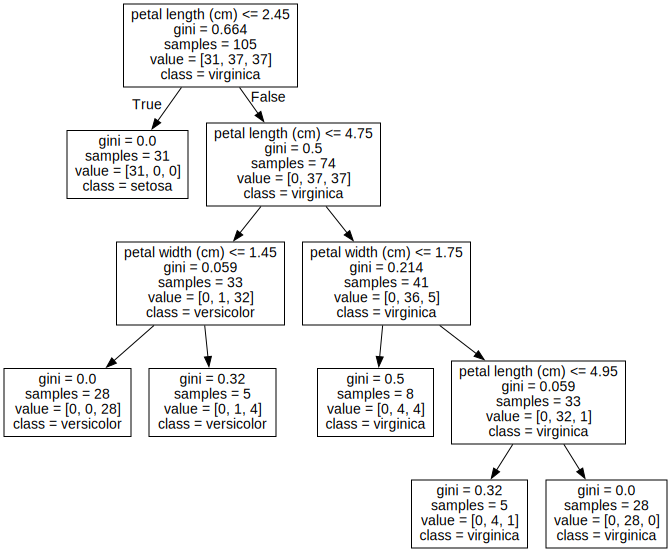

In [40]:
target = list(iris_fishera['target'].unique())
print(target)
feature_names = list(X.columns)
dot_data = tree.export_graphviz(clf_model, feature_names=feature_names, class_names=target)
graph = graphviz.Source(dot_data)
graph